# Basic objects

A `striplog` depends on a hierarchy of objects. This notebook shows the objects and their basic functionality.

- [Lexicon](#Lexicon): A dictionary containing the words and word categories to use for rock descriptions.
- [Rock](#Rock): A set of attributes. 
- [Decor](#Decor): One element from a legend — describes how to display a Rock.
- [Legend](#Legend): A set of Decors — describes how to display a set of Rocks or a Striplog.
- [Interval](#Interval): One element from a Striplog — consists of a top, base, a description, a Rock, and a source.

Striplogs (a set of `Interval`s) are described in [a separate notebook](Striplog_object.ipynb).

### To do

The text `description` should probably be an object of its own, subclassing `str`. This would allow it to hold a provenance, and some of the language functions currently awkwardly held in `Interval`, such as `__split_description()` and `__parse_description()`.

<hr />

## Lexicon

In [1]:
from striplog import Lexicon
print(Lexicon.__doc__)


    A Lexicon is a dictionary of 'types' and regex patterns.

    Most commonly you will just load the default one.

    Args:
        params (dict): The dictionary to use. For an example, refer to the
            default lexicon in ``defaults.py``.
    


In [2]:
lexicon = Lexicon.default()
lexicon

{'colour': ['red(?:dish)?', 'gray(?:ish)?', 'grey(?:ish)?', 'black(?:ish)?', 'whit(?:e|ish)', 'blu(?:e|ish)', 'purpl(?:e|ish)', 'yellow(?:ish)?', 'green(?:ish)?', 'brown(?:ish)?', 'light', 'dark', 'sandy'], 'parts_of_speech': {'subordinate': ['amount'], 'adjective': ['colour', 'grainsize'], 'noun': ['lithology']}, 'grainsize': ['vf(?:-)?', 'f(?:-)?', 'm(?:-)?', 'c(?:-)?', 'vc', 'very fine(?: to)?', 'fine(?: to)?', 'medium(?: to)?', 'coarse(?: to)?', 'very coarse', 'v fine(?: to)?', 'med(?: to)?', 'med.(?: to)?', 'v coarse', 'grains?', 'granules?', 'pebbles?', 'cobbles?', 'boulders?'], 'lithology': ['overburden', 'sandstone', 'siltstone', 'shale', 'mudstone', 'limestone', 'dolomite', 'salt', 'halite', 'anhydrite', 'gypsum', 'sylvite', 'clay', 'mud', 'silt', 'sand', 'gravel', 'boulders'], 'synonyms': {'Overburden': ['Drift'], 'Anhydrite': ['Gypsum'], 'Salt': ['Halite', 'Sylvite']}, 'abbreviations': {'assoc': 'associated', 'hi': 'high', 'Vad': 'vadose', 'hd': 'hard', 'ves': 'vesicular', '

In [3]:
import striplog
striplog.__version__

'5.0.6'

In [4]:
lexicon.synonyms

{'Anhydrite': ['Gypsum'],
 'Overburden': ['Drift'],
 'Salt': ['Halite', 'Sylvite']}

Most of the lexicon works 'behind the scenes' when processing descriptions into `Rock` components.

In [5]:
lexicon.find_synonym('Halite')

'salt'

In [6]:
s = "lt gn ss w/ sp gy sh"

In [7]:
lexicon.expand_abbreviations(s)

'lighter green sandstone with spotty gray shale'

<hr />

## Component

A set of attributes. All are optional.

In [8]:
from striplog import Component

In [9]:
print(Component.__doc__)


    Initialize with a dictionary of properties. You can use any
    properties you want e.g.:

        - lithology: a simple one-word rock type
        - colour, e.g. 'grey'
        - grainsize or range, e.g. 'vf-f'
        - modifier, e.g. 'rippled'
        - quantity, e.g. '35%', or 'stringers'
        - description, e.g. from cuttings

    You can include as many other things as you want, e.g.

        - porosity
        - cementation
        - lithology code
    


We define a new rock with a Python `dict` object:

In [10]:
r = {'colour': 'grey',
     'grainsize': 'vf-f',
     'lithology': 'sand'}
rock = Component(r)
rock

Component("colour":"grey", "grainsize":"vf-f", "lithology":"sand")

In [11]:
type(rock)

striplog.component.Component

The Rock has a colour:

In [12]:
rock.colour

'grey'

And it has a summary, which is generated from its attributes. 

In [13]:
rock.summary()

'Grey, vf-f, sand'

We can format the summary if we wish:

In [14]:
rock.summary(fmt="My rock: {lithology} ({colour}, {GRAINSIZE})")

'My rock: sand (grey, VF-F)'

We can compare rocks with the usual `==` operator: 

In [15]:
rock2 = Component({'grainsize': 'VF-F',
              'colour': 'Grey',
              'lithology': 'Sand'})
rock == rock2

True

In [16]:
rock3 = Component({'grainsize': 'Coarse',
              'colour': 'Grey',
              'lithology': 'Sand'})
rock == rock3

False

In order to create a Rock object from text, we need a lexicon to compare the text against. The lexicon describes the language we want to extract, and what it means. More on lexicons later.

In [17]:
from striplog import Lexicon

In [18]:
lexicon = Lexicon.default()

In [19]:
rock3 = Component.from_text('Grey fine sandstone.', lexicon)
rock3

Component("colour":"grey", "grainsize":"fine", "lithology":"sandstone")

In [20]:
rock4 = Component.from_text('Grey, sandstone, vf-f ', lexicon)
rock4

Component("colour":"grey", "grainsize":"vf-f", "lithology":"sandstone")

<hr />

## Decor

In [21]:
from striplog import Decor

import matplotlib.pyplot as plt
%matplotlib inline

A Decor attaches a display style to a Rock. 

In [22]:
print(Decor.__doc__)


    A single display style. A Decor describes how to display a given set
    of Component properties.

    In general, you will not usually use a Decor on its own. Instead, you
    will want to use a Legend, which is just a list of Decors, and leave
    the Decors to the Legend.

    Args:
      params (dict): The parameters you want in the Decor. There must be a
        Component to attach the decoration to, and at least 1 other attribute.
        It's completely up to you, but you probably want at least a colour
        (hex names like #AAA or #d3d3d3, or matplotlib's English-language
        names listed at http://ageo.co/modelrcolour are acceptable.

        The only other parameter the class recognizes for now is 'width',
        which is the width of the striplog element.

    Example:
      my_rock = Component({ ... })
      d = {'component': my_rock, 'colour': 'red'}
      my_decor = Decor(d)
    


Like `Rock`s, we instantiate `Decor`s with a `dict` of properties:

In [23]:
d = {'color': '#86F0B6',
     'component': rock,
     'width': 3}
decor = Decor(d)
decor

Decor(component='"colour":"grey", "grainsize":"vf-f", "lithology":"sand"', colour='#86f0b6', width='3.0')

You can access its attributes. It has two ways to understand colour:

In [24]:
decor.colour

'#86f0b6'

In [25]:
decor.rgb

(134, 240, 182)

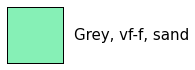

In [26]:
decor.plot()

<hr />

## Legend

In [27]:
from striplog import Legend
print(Legend.__doc__)


    A look-up table to assist in the conversion of Components to
    a plot colour.

    Args:
        list_of_Decors (list): The decors to collect into a legend. In
            general, you will want to leave legend building to the constructor
            class methods, `Legend.default()`, and `Legend.from_csv(string)`.
            We can add others over time, such as `from_xls` and so on.
    


We'll define a legend in a CSV file. I can't think of a better way for now. It would be easy to make a web form to facilitate this with, for example, a colour picker. It may not be worth it, though; I imagine one would create one and then leave it alone most of the time. 

In [28]:
l = u"""colour, width, component lithology, component colour, component grainsize
#FFFFFF, 0, , , 
#F7E9A6, 3, Sandstone, Grey, VF-F
#FF99CC, 2, Anhydrite, , 
#DBD6BC, 3, Heterolithic, Grey, 
#FF4C4A, 2, Volcanic, , 
#86F0B6, 5, Conglomerate, , 
#FF96F6, 2, Halite, , 
#F2FF42, 4, Sandstone, Grey, F-M
#DBC9BC, 3, Heterolithic, Red, 
#A68374, 2, Siltstone, Grey, 
#A657FA, 3, Dolomite, , 
#FFD073, 4, Sandstone, Red, C-M
#A6D1FF, 3, Limestone, , 
#FFDBBA, 3, Sandstone, Red, VF-F
#FFE040, 4, Sandstone, Grey, C-M
#A1655A, 2, Siltstone, Red, 
#363434, 1, Coal, , 
#664A4A, 1, Mudstone, Red, 
#666666, 1, Mudstone, Grey, """

In [29]:
legend = Legend.from_csv(l)
legend[:5]

Legend(component='', colour='#ffffff', width='0.0'
component='"colour":"grey", "grainsize":"vf-f", "lithology":"sandstone"', colour='#f7e9a6', width='3.0'
component='"lithology":"anhydrite"', colour='#ff99cc', width='2.0'
component='"colour":"grey", "lithology":"heterolithic"', colour='#dbd6bc', width='3.0'
component='"lithology":"volcanic"', colour='#ff4c4a', width='2.0')

In [30]:
legend = Legend.default()
print(legend.to_csv())

colour,width,component colour,component grainsize,component lithology
#ffffff,0.0,,,,
#f7e9a6,3.0,grey,vf-f,sandstone,
#ff99cc,2.0,,,anhydrite,
#dbd6bc,3.0,grey,,heterolithic,
#ff4c4a,2.0,,,volcanic,
#86f0b6,5.0,,,conglomerate,
#ff96f6,2.0,,,halite,
#f2ff42,4.0,grey,f-m,sandstone,
#dbc9bc,3.0,red,,heterolithic,
#a68374,2.0,grey,,siltstone,
#a657fa,3.0,,,dolomite,
#ffd073,4.0,red,c-m,sandstone,
#a6d1ff,3.0,,,limestone,
#ffdbba,3.0,red,vf-f,sandstone,
#ffe040,4.0,grey,c-m,sandstone,
#a1655a,2.0,red,,siltstone,
#363434,1.0,,,coal,
#664a4a,1.0,red,,mudstone,
#666666,1.0,grey,,mudstone,



In fact, this is the default legend. 

In [31]:
Legend.default()

Legend(component='', colour='#ffffff', width='0.0'
component='"colour":"grey", "grainsize":"vf-f", "lithology":"sandstone"', colour='#f7e9a6', width='3.0'
component='"lithology":"anhydrite"', colour='#ff99cc', width='2.0'
component='"colour":"grey", "lithology":"heterolithic"', colour='#dbd6bc', width='3.0'
component='"lithology":"volcanic"', colour='#ff4c4a', width='2.0'
component='"lithology":"conglomerate"', colour='#86f0b6', width='5.0'
component='"lithology":"halite"', colour='#ff96f6', width='2.0'
component='"colour":"grey", "grainsize":"f-m", "lithology":"sandstone"', colour='#f2ff42', width='4.0'
component='"colour":"red", "lithology":"heterolithic"', colour='#dbc9bc', width='3.0'
component='"colour":"grey", "lithology":"siltstone"', colour='#a68374', width='2.0'
component='"lithology":"dolomite"', colour='#a657fa', width='3.0'
component='"colour":"red", "grainsize":"c-m", "lithology":"sandstone"', colour='#ffd073', width='4.0'
component='"lithology":"limestone"', colour='#a6d1

We can ask the Legend what colour to use for a given Rock object:

In [32]:
legend.get_colour(rock)

'#eeeeee'

In [33]:
rock3 = Component({'colour': 'red',
           'grainsize': 'vf-f',
           'lithology': 'sandstone'})
legend.get_colour(rock3)

'#ffdbba'

Sometimes we also want to use a width for a given lithology:

In [34]:
legend.get_width(rock3)

3.0

We can also ask the legend which Rock is represented by a particular colour. (I doubt you'd ever really need to do this, but I had to implement this to allow you to make a `Striplog` from an image: it looks up the rocks to use by colour.)

In [35]:
legend.get_component('#f7e9a6')

Component("grainsize":"vf-f", "colour":"grey", "lithology":"sandstone")

The `Legend` behaves more or less like a list, so we can index into it:

In [36]:
legend[3:5]

Legend(component='"colour":"grey", "lithology":"heterolithic"', colour='#dbd6bc', width='3.0'
component='"lithology":"volcanic"', colour='#ff4c4a', width='2.0')

`Legend`s can plot themselves. 

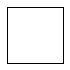

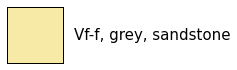

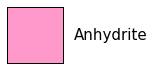

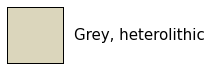

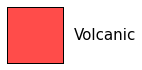

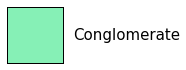

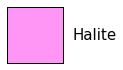

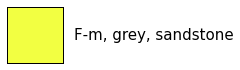

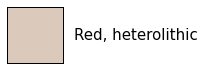

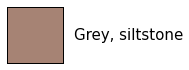

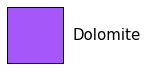

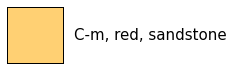

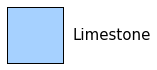

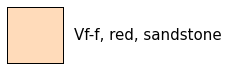

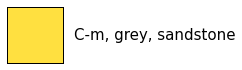

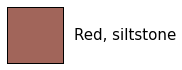

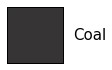

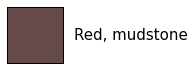

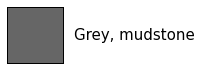

In [37]:
legend.plot()

<hr />

## Interval

In [38]:
from striplog import Interval
print(Interval.__doc__)


    Used to represent a lithologic or stratigraphic interval, or single point,
    such as a sample location.

    Initialize with a top (and optional base) and a description and/or
    an ordered list of components.

    Args:
        top (float): Required top depth. Required.
        base (float): Base depth. Optional.
        lexicon (dict): A lexicon. See documentation. Optional unless you only
            provide descriptions, because it's needed to extract components.
        max_component (int): The number of components to extract. Default 1.
        abbreviations (bool): Whether to parse for abbreviations.

    


In [39]:
interval = Interval(20, 40, "Grey sandstone.", lexicon=lexicon)
interval

Interval(top: 20.0, base: 40.0, description: 'Grey sandstone.', components: [Component("colour":"grey", "lithology":"sandstone")])

`Interval`s have a `primary` attribute, which holds the first component, no matter how many components there are.

In [40]:
interval.primary

Component("colour":"grey", "lithology":"sandstone")

Ask for the summary to see the thickness and a `Rock` summary of the primary component. Note that the format code only applies to the `Rock` part of the summary.

In [41]:
interval.summary(fmt="{colour} {lithology}")

'20.00 m of grey sandstone'

We can compare intervals, based on their thickness. Let's make one which is 5 m thicker than the prvious one.

In [42]:
interval_2 = Interval(40, 65, "Red sandstone.", lexicon=lexicon)

In [43]:
print(interval_2 == interval)
print(interval_2 > interval)
print(max(interval, interval_2).summary())

False
True
25.00 m of red, sandstone


We can combine intervals with the `+` operator. (However, you cannot subtract intervals.)

In [44]:
interval_2 + interval

Interval(top: 20.0, base: 65.0, description: '55.6% Red sandstone with 44.4% Grey sandstone', components: [Component("colour":"red", "lithology":"sandstone"), Component("colour":"grey", "lithology":"sandstone")])

If we add a number to an `interval`, it adds thickness to the base.

In [45]:
interval + 5

Interval(top: 20.0, base: 45.0, description: 'Grey sandstone.', components: [Component("colour":"grey", "lithology":"sandstone")])

Adding a rock adds a (minor) component and adds to the description. 

In [46]:
interval + rock3

Interval(top: 20.0, base: 40.0, description: 'Grey sandstone. with Vf-f, red, sandstone', components: [Component("colour":"grey", "lithology":"sandstone"), Component("grainsize":"vf-f", "colour":"red", "lithology":"sandstone")])

<hr />

<p style="color:gray">©2015 Agile Geoscience. Licensed CC-BY. <a href="https://github.com/agile-geoscience/striplog">striplog.py</a></p>